## Creating a timeseries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import cmocean.cm as cm
import cartopy 
import cartopy.crs as ccrs
import os
from matplotlib.gridspec import GridSpec
import datetime as dt

In [2]:
file_folder = 'D:\\homework\\homework11\\data'
# file_path = os.path.join(file_folder, 'SMAP_L3_SSS_201901_MONTHLY_V5.0.nc')

# # open the file and read in the wind speed variable to a 2D numpy grid
# ds = nc4.Dataset(file_path)
# wind_spd = np.array(ds.variables['smap_spd'])
# ds.close()

file_list_windspd = []

import os

for file_name_windspd in os.listdir(file_folder):
    
      if file_name_windspd[-3:] == '.nc':
          file_list_windspd.append(file_name_windspd)

# sort the file list
file_list_windspd.sort()

In [6]:
# made empty lists to store data all of the files
date_list = []
windspd_values = []

# loop through all of the files in the file list
for file_name_windspd in file_list_windspd:
    
    # make a date string for the file
    date_str = file_name_windspd.split('_')
    
    # open the file to get the seaice grid
    year = date_str[3][:4]
    month = date_str[3][4:6]
    day = '15' # why does it read individual numbers but it wont read in date_str[3][6:8]? the date_array wont work if I dont have a "day"
    date_str = year+'-'+month+'-'+day
    file_path = os.path.join(file_folder, file_name_windspd)
    ds = nc4.Dataset(file_path)
    smap_spd = np.array(ds.variables['smap_spd'])
    ds.close()

    wind_spd_masked_winter = np.ma.masked_where(smap_spd<0, smap_spd)
    
    date_list.append(date_str)
    windspd_values.append(wind_spd_masked_winter)
# make a date_array from the date_list
date_array=np.array(date_list, dtype='datetime64')
print(date_array)
# print(date_list)
# print(windspd_values)

['2019-01-15' '2019-02-15' '2019-03-15' '2019-04-15' '2019-05-15'
 '2019-06-15' '2019-07-15' '2019-08-15' '2019-09-15' '2019-10-15'
 '2019-11-15' '2019-12-15' '2020-01-15' '2020-02-15' '2020-03-15'
 '2020-04-15' '2020-05-15' '2020-06-15' '2020-07-15' '2020-08-15'
 '2020-09-15' '2020-10-15' '2020-11-15' '2020-12-15' '2021-01-15'
 '2021-02-15' '2021-03-15' '2021-04-15' '2021-05-15' '2021-06-15'
 '2021-07-15' '2021-08-15' '2021-09-15' '2021-10-15' '2021-11-15'
 '2021-12-15' '2022-01-15' '2022-02-15' '2022-03-15' '2022-04-15'
 '2022-05-15' '2022-06-15' '2022-07-15' '2022-08-15' '2022-10-15'
 '2022-11-15' '2022-12-15' '2023-01-15' '2023-02-15' '2023-03-15'
 '2023-04-15' '2023-05-15' '2023-06-15' '2023-07-15' '2023-08-15'
 '2023-09-15' '2023-10-15' '2023-11-15' '2023-12-15']


## Creating a figure

Text(0.5, 1.0, 'Jan 2019 Monthly data')

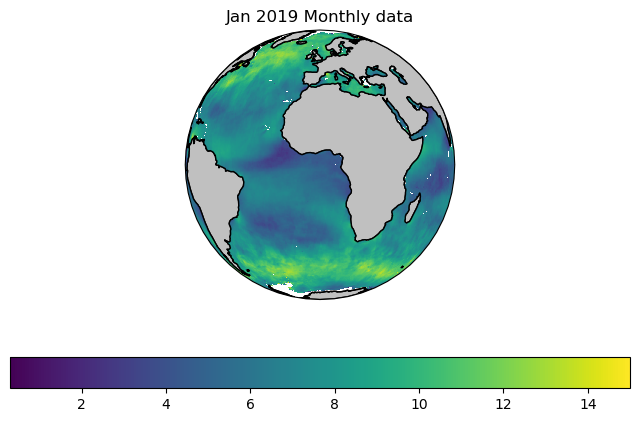

In [10]:
file_path = 'D:\homework\homework11\data\SMAP_L3_SSS_201901_MONTHLY_V5.0.nc'

# load the longitude, latitude, and wind speed data from this file
ds = nc4.Dataset(file_path)
longitude = np.array(ds.variables['longitude'])
latitude = np.array(ds.variables['latitude'])
wind_spd = np.array(ds.variables['smap_spd'])
ds.close()

wind_spd_masked = np.ma.masked_where(wind_spd<0, wind_spd)

plt.figure(figsize=(8,5))

# add a new set of axes with the Robinson projection
ax = plt.axes(projection = ccrs.Orthographic())

# add the coastlines
plt.pcolormesh(longitude, latitude, wind_spd_masked, transform=ccrs.PlateCarree(), vmax=15)

#add colorbar
plt.colorbar(orientation='horizontal')

# add land features over the data, to get polygons
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black', facecolor='silver')

# add a title to the plot with the date
plt.title('Jan 2019 Monthly data')

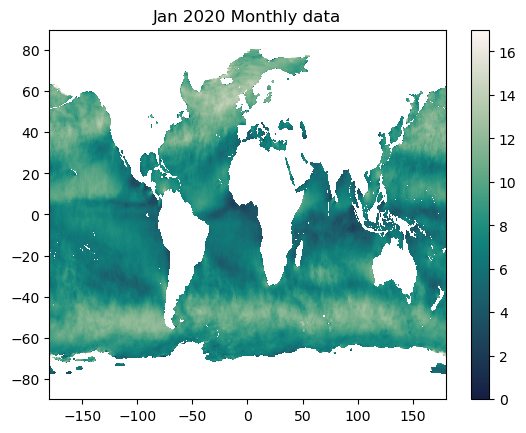

In [13]:
file_path = 'D:\homework\homework11\data\SMAP_L3_SSS_202001_MONTHLY_V5.0.nc'

# load the longitude, latitude, and wind speed data from this file
ds = nc4.Dataset(file_path)
longitude = np.array(ds.variables['longitude'])
latitude = np.array(ds.variables['latitude'])
wind_spd = np.array(ds.variables['smap_spd'])
ds.close()

wind_spd_masked = np.ma.masked_where(wind_spd<0, wind_spd)

fig = plt.figure()

# use pcolormesh to plot the data
plt.pcolormesh(longitude, latitude, wind_spd_masked, vmin =0, vmax=17, cmap=cm.tempo_r)

# add a colorbar to the image
plt.colorbar()
plt.title('Jan 2020 Monthly data')

#show the plot
plt.show()

## Future analysis
I have separated the data for all 5 years into their respective seasons, and I want to plot each season on a map.

Ideas:
   - Average the data for each month and then plot the averaged values for each month.
    -Alternatively, separate the data by month across all 5 years, create a list for each month, average the values, and then plot the result. This would give me 5 Januaries, 5 Februaries, and so on.
    - Or just average the year
GOAL:
I wanted to be able to make graphs for each season over 5 years

In [ ]:
file_folder = 'D:\\homework\\homework11\\data'

file_path= os.path.join(file_folder, 'SMAP_L3_SSS_201901_MONTHLY_V5.0.nc')

ds = nc4.Dataset(file_path)
longitude = np.array(ds.variables['longitude'])
latitude = np.array(ds.variables['latitude'])
wind_spd = np.array(ds.variables['smap_spd'])
ds.close()

wind_spd=wind_spd[0, :]

sum_grid = np.zeros_like(wind_spd)
count_grid= np.zeros_like(wind_spd)

file_list = []

import os
# write a for loop to loop through the files
for file_name in os.listdir(file_folder):
    
    # if the file is an nc file from SMAP, we have to make sure all the files are .nc
      if file_name[-3:] == '.nc':
          file_list.append(file_name)

# sort the file list
file_list.sort()

# print the number of files that are found
print(file_list)

In [ ]:
winter_date = []
winter_values = []

# loop through all of the files in the file list
for file_name in file_list:

    # before starting make sure to indent that way it is in the loop
    # make a date string for the file, this implies year, month and day
    # we have to into our file names in our external drive (where we stored our data) to look at the year, month and day 
    # year = you split the file name by underscore(_) then grab index 3 and the first four digits
    # then do the same for month and day but look at how its split so you know exactly where the month and day are.
    year = file_name.split('_')[3][:4]
    month = file_name.split('_')[3][4:6]
    
    if int(month) in [12,1,2]:

    # open the file to get the ssh grid, this is almost the same code as we did in the previous codeblock
    # just change some of the names within the nc4.dataset
        ds = nc4.Dataset(os.path.join(file_folder, file_name))
        longitude = np.array(ds.variables['longitude'])
        latitude = np.array(ds.variables['latitude'])
        smap_spd = np.array(ds.variables['smap_spd'])
        ds.close()
        
        wind_spd_masked_winter = np.ma.masked_where(smap_spd<0, smap_spd) 
        # add the data to the lists
        winter_values.append(wind_spd_masked_winter)
        winter_date.append(year+'-'+month)

# make a date_array from the date_list, you have to add datetime64 in order to tell it that it wants that 
# type of data in that specific format
# winter_array = np.array(winter_date, dtype='datetime64')
# print(winter_array)
print(winter_date)

In [ ]:
spring_list = []
spring_values = []

# loop through all of the files in the file list
for file_name in file_list:

    # before starting make sure to indent that way it is in the loop
    # make a date string for the file, this implies year, month and day
    # we have to into our file names in our external drive (where we stored our data) to look at the year, month and day 
    # year = you split the file name by underscore(_) then grab index 3 and the first four digits
    # then do the same for month and day but look at how its split so you know exactly where the month and day are.
    year = file_name.split('_')[3][:4]
    month = file_name.split('_')[3][4:6]
    
    if int(month) in [3,4,5]:

    # open the file to get the ssh grid, this is almost the same code as we did in the previous codeblock
    # just change some of the names within the nc4.dataset
        ds = nc4.Dataset(os.path.join(file_folder, file_name))
        longitude = np.array(ds.variables['longitude'])
        latitude = np.array(ds.variables['latitude'])
        smap_spd = np.array(ds.variables['smap_spd'])
        ds.close()
        
        wind_spd_masked_spring = np.ma.masked_where(smap_spd<0, smap_spd) 
        # add the data to the lists
        spring_values.append(wind_spd_masked_spring)
        spring_list.append(year+'-'+month)

# make a date_array from the date_list, you have to add datetime64 in order to tell it that it wants that 
# type of data in that specific format
spring_array = np.array(spring_list, dtype='datetime64')
print(spring_array)

In [ ]:
summer_list = []
summer_values = []

# loop through all of the files in the file list
for file_name in file_list:

    # before starting make sure to indent that way it is in the loop
    # make a date string for the file, this implies year, month and day
    # we have to into our file names in our external drive (where we stored our data) to look at the year, month and day 
    # year = you split the file name by underscore(_) then grab index 3 and the first four digits
    # then do the same for month and day but look at how its split so you know exactly where the month and day are.
    year = file_name.split('_')[3][:4]
    month = file_name.split('_')[3][4:6]
    
    if int(month) in [6,7,8]:

    # open the file to get the ssh grid, this is almost the same code as we did in the previous codeblock
    # just change some of the names within the nc4.dataset
        ds = nc4.Dataset(os.path.join(file_folder, file_name))
        longitude = np.array(ds.variables['longitude'])
        latitude = np.array(ds.variables['latitude'])
        smap_spd = np.array(ds.variables['smap_spd'])
        ds.close()
        
        wind_spd_masked_summer = np.ma.masked_where(smap_spd<0, smap_spd) 
        # add the data to the lists
        summer_values.append(wind_spd_masked_winter)
        summer_list.append(year+'-'+month)

# make a date_array from the date_list, you have to add datetime64 in order to tell it that it wants that 
# type of data in that specific format
summer_array = np.array(summer_list, dtype='datetime64')
print(summer_array)

In [ ]:
fall_list = []
fall_values = []

# loop through all of the files in the file list
for file_name in file_list:

    # before starting make sure to indent that way it is in the loop
    # make a date string for the file, this implies year, month and day
    # we have to into our file names in our external drive (where we stored our data) to look at the year, month and day 
    # year = you split the file name by underscore(_) then grab index 3 and the first four digits
    # then do the same for month and day but look at how its split so you know exactly where the month and day are.
    year = file_name.split('_')[3][:4]
    month = file_name.split('_')[3][4:6]
    
    if int(month) in [9,10,11]:

    # open the file to get the ssh grid, this is almost the same code as we did in the previous codeblock
    # just change some of the names within the nc4.dataset
        ds = nc4.Dataset(os.path.join(file_folder, file_name))
        longitude = np.array(ds.variables['longitude'])
        latitude = np.array(ds.variables['latitude'])
        smap_spd = np.array(ds.variables['smap_spd'])
        ds.close()
        
        wind_spd_masked_fall = np.ma.masked_where(smap_spd<0, smap_spd) 
        # add the data to the lists
        fall_values.append(wind_spd_masked_fall)
        fall_list.append(year+'-'+month)

# make a date_array from the date_list, you have to add datetime64 in order to tell it that it wants that 
# type of data in that specific format
fall_array = np.array(fall_list, dtype='datetime64')
print(fall_array)